In [71]:
import pandas as pd
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df_aux = df
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [72]:
df['category'].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [73]:
df['category'].value_counts(normalize=True)*100

category
Sports & Outdoors                         34.221949
Beauty                                     0.790293
Handmade Clothing, Shoes & Accessories     0.786896
Bath & Body                                0.781290
Birthday Gifts                             0.776625
                                            ...    
Motorbike Chassis                          0.004379
Alexa Built-In Devices                     0.004379
Plugs                                      0.004379
Smart Home Security & Lighting             0.004256
Smart Speakers                             0.002210
Name: proportion, Length: 296, dtype: float64

In [74]:
primer_df = df['category'].value_counts(normalize=True)*100

primer_df = primer_df.reset_index()
primer_df

,category,proportion
0,Sports & Outdoors,34.221949
1,Beauty,0.790293
2,"Handmade Clothing, Shoes & Accessories",0.786896
3,Bath & Body,0.781290
4,Birthday Gifts,0.776625
...,...,...
291,Motorbike Chassis,0.004379
292,Alexa Built-In Devices,0.004379
293,Plugs,0.004379
294,Smart Home Security & Lighting,0.004256


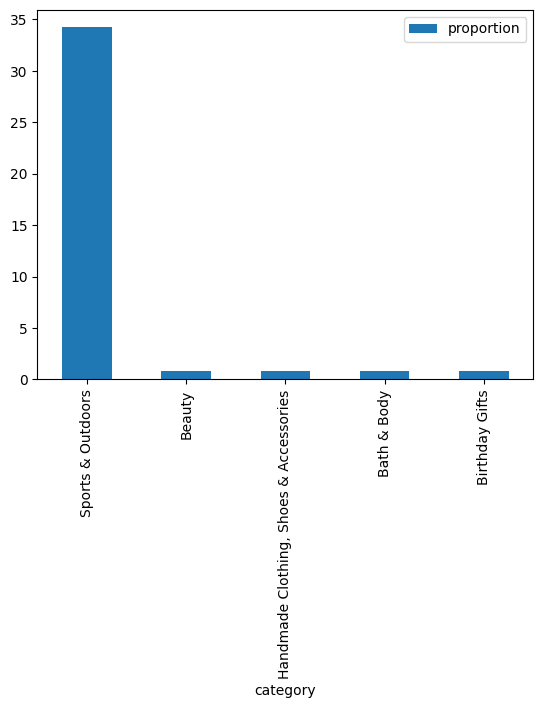

In [75]:

df = primer_df.head(5)

ax = df.plot.bar(x='category', y='proportion', rot=90)

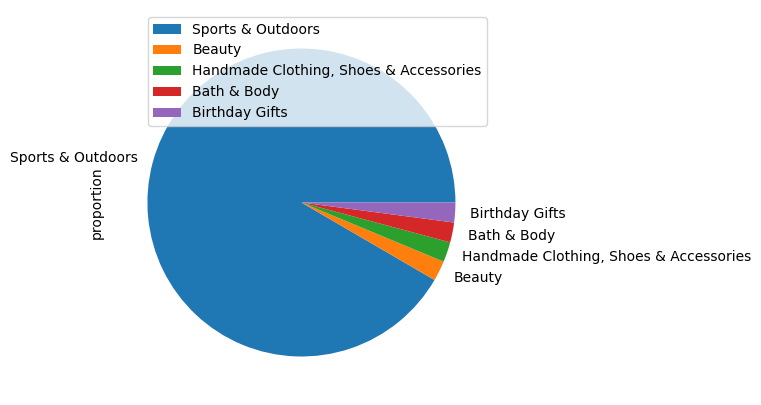

In [76]:
df.set_index('category', inplace=True)
plot = df.plot.pie(y='proportion', figsize=(5, 5))

In [86]:
print('media: ',df_aux['price'].mean())
print('median: ',df_aux['price'].median())
print('mode: ', df_aux['price'].mode()[0])

# La media es de 90 pounds, mientras que la moda es de 10, esto quiere decir que la mayoría de los productos en Amazon UK cuestan 9.99 pounds, 
# luego podemos intuir que hay muchos productos con un precio bastante elevado ya que la media está muy alejada de la moda y de la mediana.

print('diference: ',df_aux['price'].mean() - df_aux['price'].mode()[0])


media:  89.24380943923663
median:  19.09
mode:  9.99
diference:  79.25380943923663


In [91]:
print('variance: ', df_aux['price'].var())
print('standard deviation: ', df_aux['price'].std())
print(f'Rango: {df_aux['price'].max()}/{df_aux['price'].min()}')
print('interquantile 25%: ', df_aux['price'].quantile(0.25))
print('interquantile 75%: ', df_aux['price'].quantile(0.75))

# Hay mucha variedad en los precios de los productos, ya que hay una desviación estandar de unos 345 pounds, que es mucha cantidad
# Aparte indica que el 75% de los productos cuestan menos de 46 pounds, es decir que la media (90%) está por encima del 75%

variance:  119445.48532254907
standard deviation:  345.60886175349884
Rango: 100000.0/0.0
interquantile 25%:  9.99
interquantile 75%:  45.99


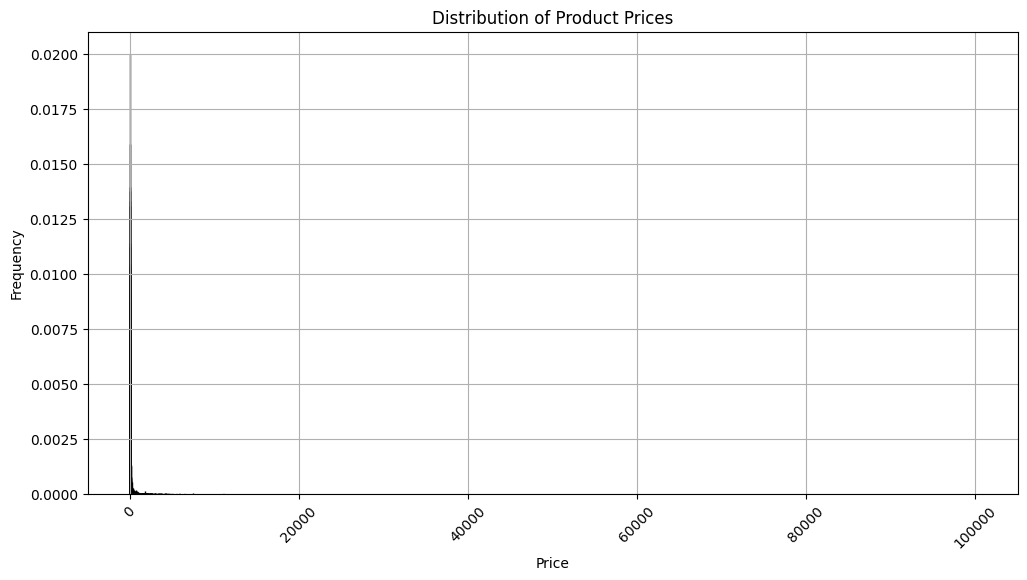

In [106]:

import matplotlib.pyplot as plt
price_counts = df_aux['price'].value_counts(normalize=True).sort_index()

# Crear un gráfico de barras manualmente
plt.figure(figsize=(12, 6))
plt.bar(price_counts.index, price_counts.values, edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.grid(True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x28ba61cc9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x28ba61cce90>,
 'boxes': [<matplotlib.lines.Line2D at 0x28ba61cc770>],
 'medians': [<matplotlib.lines.Line2D at 0x28ba61cd670>],
 'fliers': [<matplotlib.lines.Line2D at 0x28ba61cd850>],
 'means': []}

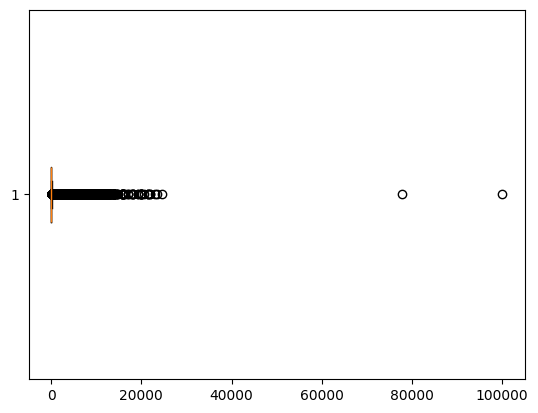

In [110]:
# LA conclusión es que los precios están entre los 10000 pounds y los 0, mientras que hay 2 outliers claros, uno con un precio de 100000 pounds
# , que hemos buscado en internet y cuesta 10000 y otro outlier de aprox 80000 pounds
plt.boxplot(df_aux['price'], vert=False)

In [114]:
"""
Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
"""
print('mean: ',df_aux['stars'].mean())
print('median: ',df_aux['stars'].median())
print('mode: ',df_aux['stars'].mode())
# La mayoría de los consumidores no ponen ninguna reseña o 0 estrellas ya que no hay valores nulos, si no hay reseña lo coge como 0, por lo que 
# el valor más común es 0.0 starts 

mean:  2.152836472966065
median:  0.0
mode:  0    0.0
Name: stars, dtype: float64


In [119]:
"""  
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
"""
print('variance: ', df_aux['stars'].var())
print('interquantile 25%: ', df_aux['stars'].quantile(0.25))
print('interquantile 75%: ', df_aux['stars'].quantile(0.75))
# Hay mucha desviación, ya que el valor máximo es 5 y la varianza es 4.8, por lo que es muchísima variación

variance:  4.817434029796862
interquantile 25%:  0.0
interquantile 75%:  4.4


In [120]:
""" 
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

"""
import pandas as pd
from scipy.stats import skew, kurtosis

df = df_aux

rating_skewness = skew(df['stars'])
rating_kurtosis = kurtosis(df['stars'])

print(f'Skewness: {rating_skewness}')
print(f'Kurtosis: {rating_kurtosis}')

# La conclusión a la que llego es que la skewness es de 0.08 y la kurtosis es de -1.92


Skewness: 0.08120730776283354
Kurtosis: -1.926004642549839


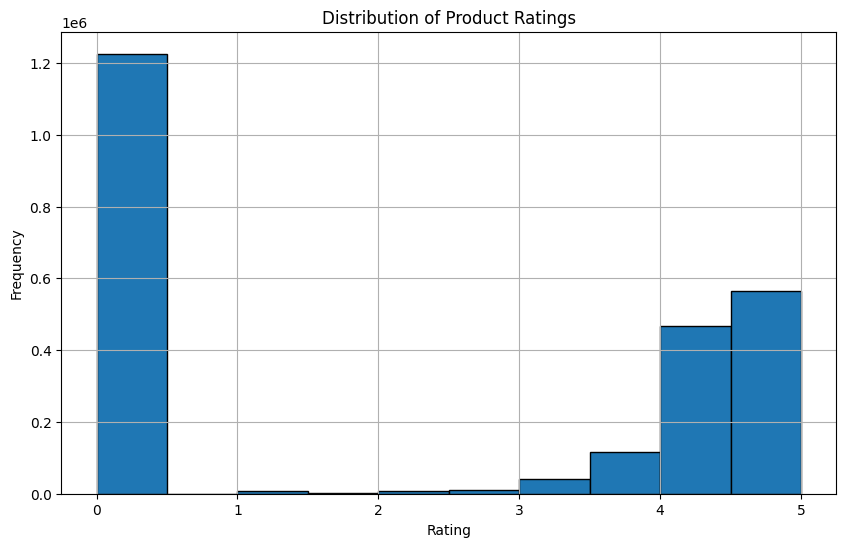

In [122]:
"""
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
Submission: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 
"""
plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=10, edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()